# **Install and Load Library**

In [ ]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

%matplotlib inline

# **Load Dataset**

In [ ]:
# load e-commerce  dataset
e_com = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv", encoding="latin-1")

In [ ]:
# check the first 5 data e-commerce
e_com.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **E-commerce Data**

In [ ]:
# check data structure
e_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

In [ ]:
# create invoice_date column
e_com['Order Date'] = pd.to_datetime(e_com['Order Date']).dt.normalize()

#Unit Price after Discount
e_com['Potongan harga'] = e_com["Sales"]* e_com['Discount']

#Unit Pirce After Discount
e_com['Unit Price'] = round(e_com['Sales'] - e_com['Potongan harga'], 3)


# create gmv column based on UnitPrice * Quantity
e_com["gmv"] = round(e_com["Sales"] * e_com["Quantity"], 3)

In [ ]:
# Aggregate data
e_com = e_com.groupby('Order Date', as_index=False).agg({
    "Row ID": 'nunique',
    "Order ID": 'nunique',
    "gmv": 'sum'
}).query("gmv > 0")

In [ ]:
# Renaming
com_day = e_com.rename(columns={
    "Row ID": "Total TRX",
    "Order ID": "Total Buyer",
    "gmv": "GMV"
})

In [ ]:
# check the first 5 rows
com_day.head()

,Order Date,Total TRX,Total Buyer,GMV
0,2014-01-03,1,1,32.896
1,2014-01-04,3,1,860.640
2,2014-01-05,1,1,58.608
3,2014-01-06,9,3,28430.780
4,2014-01-07,2,1,303.194


In [ ]:
# sort by month column to date type
e_mon = e_com.groupby(e_com['Order Date'].dt.strftime('%Y %B'))['Total TRX', 'Total Buyer', 'GMV'].sum().sort_values(by='Order Date')
e_mon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total TRX,Total Buyer,GMV
Order Date,,,
2014 April,109,51,117530.857
2014 August,116,55,104200.806
2014 December,230,114,349223.254
2014 February,27,17,14661.972
2014 January,72,27,72836.069
2014 July,107,51,122709.714
2014 June,116,55,149752.268
2014 March,121,54,267931.675
2014 May,98,56,85920.477


In [ ]:
# sort by year column to date type
e_year = e_com.groupby(e_com['Order Date'].dt.strftime('%Y'))['Total TRX', 'Total Buyer', 'GMV'].sum().sort_values(by='Order Date',ascending = True)
e_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total TRX,Total Buyer,GMV
Order Date,,,
2014,1592,763,2111150.256
2015,1667,824,1847211.763
2016,2079,1034,2271613.116
2017,2662,1341,2895460.777


In [ ]:
# load e-commerce  dataset
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv", encoding="latin-1")

In [ ]:
df.isnull().values.sum()

0

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap

In [ ]:
# create invoice_date column
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.normalize()

In [ ]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
df['Order_Month'] = df['Order Date'].apply(get_month) 

In [ ]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = df.groupby('Customer ID')['Order_Month'] 
# Assigning a minimum InvoiceMonth value to the dataset
df['CohortMonth'] = grouping.transform('min')

In [ ]:
# printing top 5 rows
print(df.head(5))

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcas

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(df, 'Order_Month')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(df.head(5))

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        

In [ ]:
# Counting daily active user from each chort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'Customer ID')
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,Customer ID
0,2014-01-01,1,27
1,2014-01-01,4,2
2,2014-01-01,5,2
3,2014-01-01,7,2
4,2014-01-01,8,1


In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01-01,100.0,NaN,NaN,7.4,7.4,NaN,7.4,3.7,3.7,11.1,...,14.8,11.1,18.5,11.1,3.7,3.7,22.2,33.3,22.2,14.8
2014-02-01,100.0,5.9,5.9,NaN,NaN,11.8,5.9,17.6,5.9,5.9,...,11.8,5.9,23.5,NaN,5.9,23.5,5.9,29.4,NaN,NaN
2014-03-01,100.0,5.9,2.0,13.7,9.8,NaN,9.8,3.9,7.8,7.8,...,11.8,13.7,9.8,11.8,25.5,3.9,21.6,17.6,NaN,NaN
2014-04-01,100.0,6.8,NaN,6.8,4.5,6.8,6.8,13.6,11.4,2.3,...,11.4,11.4,13.6,15.9,13.6,13.6,20.5,NaN,NaN,NaN
2014-05-01,100.0,10.2,6.1,4.1,16.3,6.1,16.3,16.3,6.1,4.1,...,10.2,8.2,30.6,16.3,22.4,16.3,NaN,NaN,NaN,NaN
2014-06-01,100.0,4.9,NaN,7.3,4.9,14.6,9.8,2.4,9.8,12.2,...,4.9,22.0,7.3,29.3,22.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,100.0,8.8,11.8,NaN,14.7,20.6,8.8,2.9,17.6,2.9,...,17.6,8.8,23.5,17.6,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,100.0,11.1,4.4,13.3,6.7,4.4,6.7,4.4,8.9,2.2,...,26.7,17.8,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,100.0,6.2,10.8,12.3,1.5,4.6,7.7,10.8,9.2,1.5,...,16.9,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Average quantity for each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

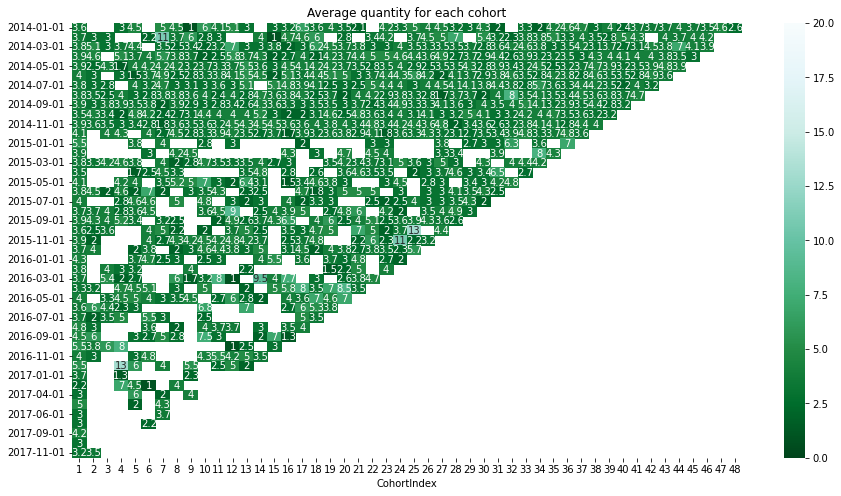

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()